In [18]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Business Problem Understanding

Customer churn adalah kehilangan pelanggan dari suatu bisnis. Churn dihitung dari berapa banyak pelanggan meninggalkan bisnis Anda dalam waktu tertentu. Customer churn merujuk pada situasi di mana pelanggan memutuskan untuk beralih ke penyedia layanan yang lain atau bahkan menghentikan penggunaan layanan telekomunikasi sepenuhnya. Untuk itu customer churn penting diketahui bisnis karena merupakan gambaran kesuksesan suatu bisnis dalam mempertahankan pelanggan.

Faktanya, mendapat pelanggan baru 5 kali lebih mahal daripada mempertahankan pelanggan yang sudah ada, dan membuat pelanggan baru menjadi loyal juga 16 kali lebih mahal. Jadi, diperlukan strategi untuk menghentikan customer churn atau kehilangan pelanggan dan meretensi pelanggan yang sudah Anda punya, karena merekalah sumber utama revenue bisnis. Jadi kita perlu memahami dan Meningkatkan Hubungan dengan Pelanggan.

**Context**

Dalam penelitian kali ini saya akan menganalisa customer churn pada layanan jasa telekomunikasi. Jasa tekomunikasi mencakup kegiatan penyelenggaraan jasa telepon dasar (telepon, telegrap, teleks, dan faksimili), jasa nilai tambah telepon (jasa jaringan pintar, kartu panggil, jasa-jasa teknologi interaktif, dan radio panggil untuk umum), jasa multimedia (VoIP, internet, komunikasi data, konferensi video, dan jasa video hiburan).


**Data Understanding**

- Dataset berikut merupakan kumpulan data pelanggan yang telah meninggalkan perusahaan penyedia layanan telekomunikasi. 
- Terdapat berbagai pelayanan yang mungkin bisa mempengaruhi customer dalam mengambil keputusan pindah layanan atau tidak
-  Kebanyakan data bertype Object, dengan jenis pengumpulan data kuesioner 


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Dependents | Object | Apakah pelanggan memiliki tanggungan atau tidak (Yes, No) |
| Tenure | int64 | Masa berlangganan |
| Online_Security | Object | Apakah pelanggan memiliki keamanan online atau tidak (Yes, No, No internet service) |
| Online_Backup | Object | Apakah pelanggan memiliki tempat pencadangan data secara online atau tidak (Yes, No, No internet service) |
| Internet_Service | Object | jenis layanan internet yang digunakan (DSL, Fiber optic, No) |
| Device_Protection | Object | Apakah klien memiliki perlindungan perangkat atau tidak. untuk melindungi informasi sensitif yang disimpan dan dikirimkan oleh laptop, ponsel cerdas, tablet, perangkat yang dapat dikenakan, dan perangkat portabel lainnya(Yes, No, No internet service) |
| Tech_Support | Object | Apakah klien memiliki dukungan teknis atau tidak (Yes, No, No internet service) |
| Contract | Integer | jangka waktu pelanggan menggunakan jasa layanan telekomunikasi (Month-to-month, One year, Two year) |
| Paperless_Billing | Object | apakah pelanggan menggunakan tagihan dalam bentuk tanpa kertas (Yes, No) |
| Monthly_Charges | float64 | Jumlah biaya untuk layanan Per-bulanan |
| Churn | Object | Apakah pelanggan berpindah atau tidak. (Yes, No) |


In [19]:
df=pd.read_csv("data_telco.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
display(df.head(),df.tail())


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes
4929,Yes,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.40,No


In [130]:
# menghitung dan mengetahui type data toap kolom
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


# Analytic Approach

Dikarenakan kebanyakan data bertype objek, maka metode yang digunakan adalah klasifikasi. Metode klasifikasi akan membantu dalam mengklasifikasikan data ke dalam kategori yang sudah ditentukan sebelumnya. Algoritma klasifikasi akan mempelajari pola dan hubungan antara variabel independen dengan variabel target. 

Diharapkan dengan menggunakan metode klasifikasi, kita dapat memprediksi apakah seorang pelanggan akan berhenti berlangganan berdasarkan fitur-fitur tersebut.

Algoritma yang akan kita gunakan Logistic Regression, Decision Tree, Random Forest, atau Support Vector Machines (SVM), K-Nearest Neighbors (KNN), untuk mempelajari pola dan membangun model klasifikasi.


# Data Cleaning

Ada kemungkinan data yang hilang/kosong dibeberapa fitur/kolom. Data tersebut dapat kita lihat dengan mencari sample unik "naN" ditiap kolom. Kemudian sample tersebut perlu kita hapus karna sample tersebut tidak lengkap. Kita akan memperbaiki semua datanya dan membuatnya menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya. 

In [21]:
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[28, 6]"
2,OnlineSecurity,object,0,0.0,3,"[No internet service, Yes]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, No]"
4,InternetService,object,0,0.0,3,"[Fiber optic, DSL]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No]"
6,TechSupport,object,0,0.0,3,"[No internet service, No]"
7,Contract,object,0,0.0,3,"[Two year, Month-to-month]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[106.3, 23.6]"


In [22]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100


Dependents          0.0
tenure              0.0
OnlineSecurity      0.0
OnlineBackup        0.0
InternetService     0.0
DeviceProtection    0.0
TechSupport         0.0
Contract            0.0
PaperlessBilling    0.0
MonthlyCharges      0.0
Churn               0.0
dtype: float64

In [23]:
# Cek data duplikat
df.duplicated().sum()


77

In [24]:
# Mengidentifikasi data duplikat
duplicatedRows = df[df.duplicated()]
duplicatedRows

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
701,No,41,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.15,Yes
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
...,...,...,...,...,...,...,...,...,...,...,...
4759,No,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.05,No
4786,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.35,No
4788,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,70.10,Yes
4866,No,1,No,No,DSL,No,No,Month-to-month,Yes,55.00,Yes


**Hasil analisa mengenai missing value & data duplikat**

Terlihat tidak terdapat misiing value, namun ditemukan 77 data duplikat dari 4929 data yang ada. 

Dikarna memang isi dari setiap variable memiliki kesamaan jawaban yang memang sudah diberikan label yang sama walaupun dengan pertanyaan yang berbeda sepeti jawaban 'yes', 'no'. Sedangkan jika diperhatikan dari 77 data tsb pada kolom 'MonthlyCharges' & 'Contract' dapat dilihat tidak ada nilai yang sama maka dapat saya anggap data yang terdeteksi duplikat ini tidak saya hapus.


# Data preparation

Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki. Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `Dependents` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
2. Merubah fitur/kolom `OnlineSecurity` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Merubah fitur/kolom `OnlineBackup` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `InternetService` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Merubah fitur/kolom `DeviceProtection` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
6. Merubah fitur/kolom `TechSupport` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
7. Merubah fitur/kolom `Contract` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
8. Merubah fitur/kolom `PaperlessBilling` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
9. Merubah fitur/kolom `Churn` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

In [25]:
# Mengubah fitur/kolom dengan One Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Dependents','OnlineSecurity','OnlineBackup','InternetService','DeviceProtection','TechSupport','Contract','PaperlessBilling','Churn'])

df_numeric = pd.concat([df_encoded], axis=1)


In [26]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Dependents','OnlineSecurity','OnlineBackup','InternetService','DeviceProtection','TechSupport','Contract','PaperlessBilling',]),
], remainder='passthrough')


In [32]:
#memisahkan kolom churn dari database dan mengubahnya menjadi int
x = df.drop(columns=['Churn'])
y = df['Churn'].map({'Yes': 1 , 'No': 0 })


In [107]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    stratify = y,
    test_size = 0.25, # 25 % of train_val set equal to 20 % of all data set 
    random_state = 2020)

In [34]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names())
testing.head()

,onehot__x0_Yes,onehot__x1_No internet service,onehot__x1_Yes,onehot__x2_No internet service,onehot__x2_Yes,onehot__x3_Fiber optic,onehot__x3_No,onehot__x4_No internet service,onehot__x4_Yes,onehot__x5_No internet service,onehot__x5_Yes,onehot__x6_One year,onehot__x6_Two year,onehot__x7_Yes,tenure,MonthlyCharges
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,38.0,102.60
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,45.0,95.00
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,48.0,102.50
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,69.0,112.55
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.10


# Model Benchmarking 

### Hyperparameter Tuning

In [35]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [45]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       904
           1       0.64      0.53      0.58       329

    accuracy                           0.79      1233
   macro avg       0.74      0.71      0.72      1233
weighted avg       0.79      0.79      0.79      1233

KNN 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       904
           1       0.55      0.48      0.51       329

    accuracy                           0.76      1233
   macro avg       0.68      0.67      0.67      1233
weighted avg       0.75      0.76      0.75      1233

Decision Tree 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       904
           1       0.47      0.47      0.47       329

    accuracy                           0.72      1233
   macro avg       0.64      0.64      0.64      1233
weighted avg       0.72      0

,roc_auc score
model,
Logistic Regression,0.847564
LightGBM,0.835116
XGBoost,0.829174
Random Forest,0.810360
KNN,0.757454
Decision Tree,0.645066


Terlihat kembali model Logistic Regression adalah yang terbaik performanya pada test data.

Logistic Regression menggunakan fungsi logistik untuk memodelkan hubungan antara fitur input dan probabilitas kelas output.



In [118]:
# Apply transformation to X_train_val and X_test
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)


# Initialize and fit the LogisticRegression model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train_transformed, y_train)

# Predict on the test set
y_pred = logreg.predict(x_test_transformed)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       904
           1       0.64      0.53      0.58       329

    accuracy                           0.79      1233
   macro avg       0.74      0.71      0.72      1233
weighted avg       0.79      0.79      0.79      1233



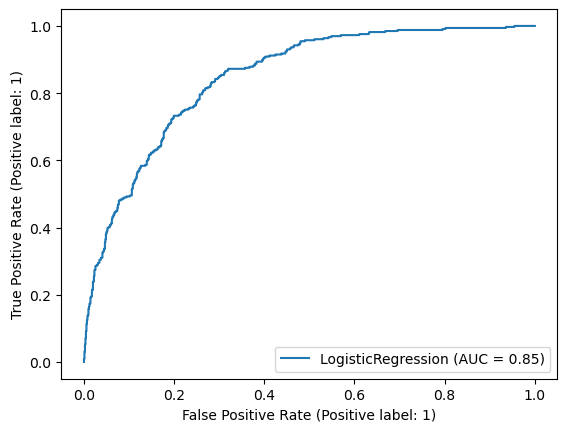

In [119]:
plot_roc_curve(logreg, x_test_transformed, y_test)

## Conclusion & Recommendation

In [132]:
#Gambaran garis besar data yang diperoleh dari tiap kolom 
#sebagai contoh posisi jawaban terbanyak, rata2 waktu dan biaya yang dikeluarkan dll
display(df.describe(), df.describe(include='object'))

pd.set_option('display.max_colwidth', -1)

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Lebih mengedukasi mengenai manfaat layanan yang sebelumnya tidak di anggap penting oleh customer sehingga nantinya diharapkan customer dapat kembali menggunakan layanan yang diberikan.
  Adanya rasa bergantung pada layanan yang kita berikan saya rasa akan baik dalam mempertahankan pelanggan.
- Menambahkan fitur2 atau kolom2 baru yang kemungkinan bisa berhubungan dengan ketertarikannya, seperti pemberian bonus atau bundling dengan produck atau layanan tertentu dengan tarif yang berbeda. 
- Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, coba gunakan teknik oversampling yang berbeda juga selain Random Over Sampling, seperti SMOTENC, dll. 
- Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.